In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

In [2]:
!pip install seaborn

In [3]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('dark_background')

In [5]:

# Importation du dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:

# Dimensions de la carte Kohonen
map_width, map_height = 15, 15
kohonen_layer = np.random.uniform(0, 1, (map_width, map_height, 28, 28)) * 255

In [7]:
# Définition du taux d'apprentissage initial
learning_rate = 0.05

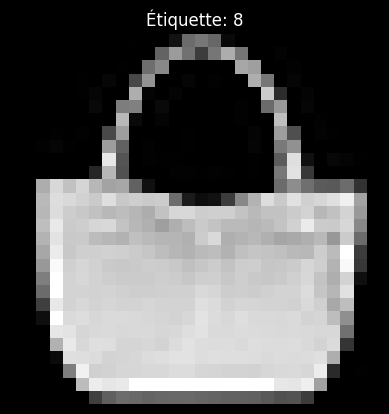

In [8]:
# Affichage d'une image d'exemple du dataset
plt.imshow(train_images[100].astype(int), cmap='gray'), plt.title(f"Étiquette: {train_labels[100]}")
plt.axis('off')
plt.show()

In [9]:
# Boucle d'apprentissage
num_iterations = 600000
decay_rate = 0.001
for iter in range(num_iterations):
    # Sélection aléatoire d'une image d'entraînement
    sample_idx = np.random.randint(0, len(train_images))
    sample_image = train_images[sample_idx]

    # Calcul de la distance pour chaque neurone et choix du gagnant
    distances = np.array([[np.linalg.norm(sample_image - kohonen_layer[x][y])
                           for y in range(map_height)] for x in range(map_width)])
    winner_idx = np.unravel_index(np.argmin(distances), (map_width, map_height))

    # Mise à jour des poids du neurone gagnant
    kohonen_layer[winner_idx] += learning_rate * (sample_image - kohonen_layer[winner_idx])

    # Mise à jour des voisins du neurone gagnant
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # voisins directs
        neighbor_x, neighbor_y = winner_idx[0] + dx, winner_idx[1] + dy
        if 0 <= neighbor_x < map_width and 0 <= neighbor_y < map_height:
            kohonen_layer[neighbor_x, neighbor_y] += (learning_rate / 2) * (sample_image - kohonen_layer[neighbor_x, neighbor_y])

    # Diminution progressive du taux d'apprentissage
    if iter % 1000 == 0:
        learning_rate *= (1 - decay_rate)

print("Apprentissage terminé !")

Apprentissage terminé !


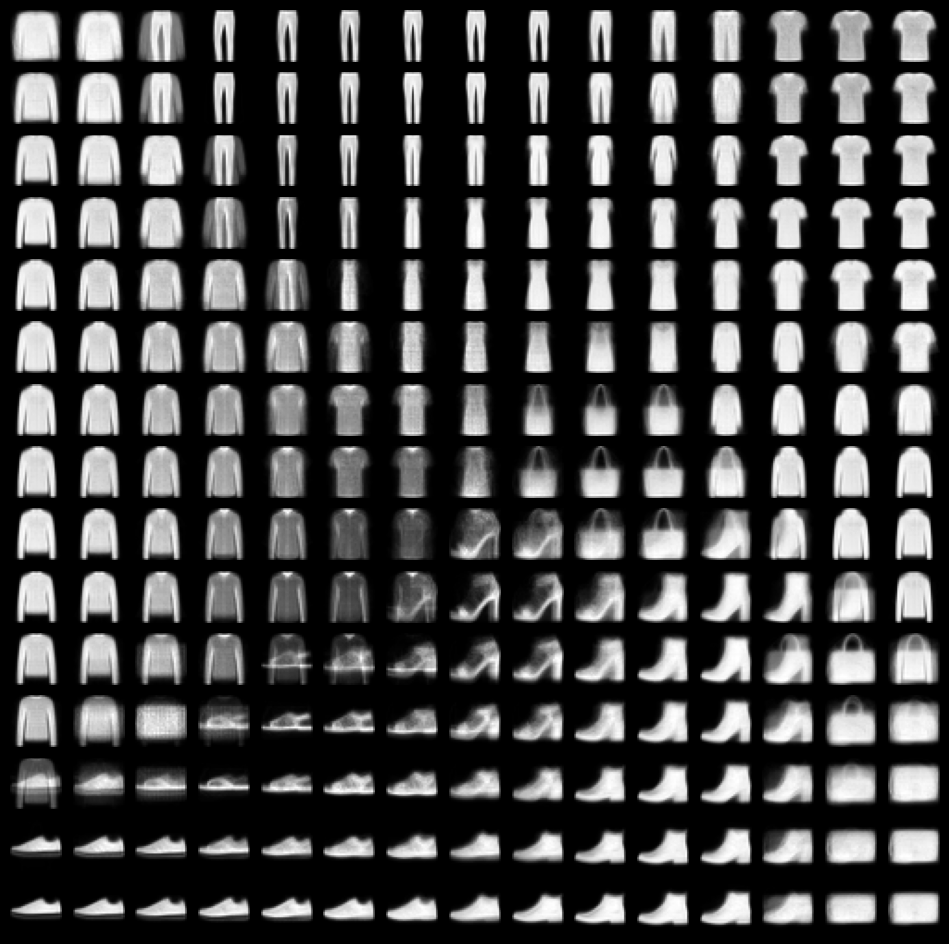

In [10]:
# Projection des images sur la carte Kohonen
mapped_train_images = []
for image in train_images:
    distances = np.array([[np.linalg.norm(image - kohonen_layer[i][j])
                           for j in range(map_height)] for i in range(map_width)])
    winner_idx = np.unravel_index(np.argmin(distances), (map_width, map_height))
    mapped_train_images.append(winner_idx)

# Affichage de quelques prototypes d'images sur la carte Kohonen
plt.figure(figsize=(12, 12))
for x in range(map_width):
    for y in range(map_height):
        plt.subplot(map_width, map_height, x * map_height + y + 1)
        plt.imshow(kohonen_layer[x][y], cmap='gray')
        plt.axis('off')
plt.show()

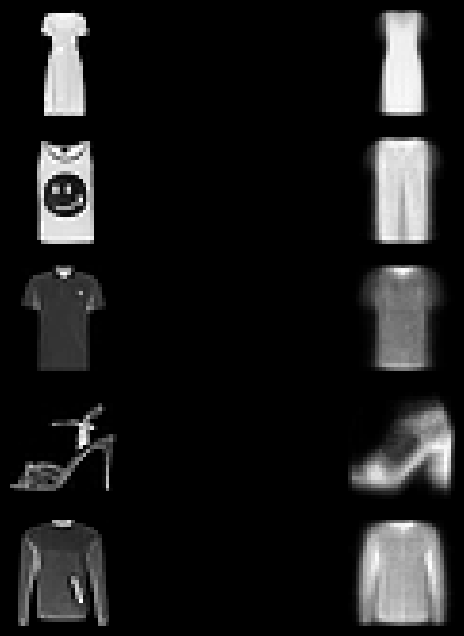

In [11]:


# Affichage de quelques correspondances avec des images d'entraînement
sample_indices = [50, 101, 202, 303, 404]
plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(5, 2, i * 2 + 1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.axis('off')
    plt.subplot(5, 2, i * 2 + 2)
    winner_x, winner_y = mapped_train_images[idx]
    plt.imshow(kohonen_layer[winner_x][winner_y], cmap='gray')
    plt.axis('off')
plt.show()
